In [ ]:
!pip install scikit-plot
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
import time
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import doc2vec
from sklearn import utils
from gensim.models.doc2vec import TaggedDocument



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
final_ds="/content/drive/MyDrive/FINAL/final.csv"
df=pd.read_csv(final_ds,encoding='utf-8',sep=',')

df=df.dropna()
df.head(15)
df

,Created_at,Tweet,Retweet_count,Favourite_count,User,Followers,Location,Si
0,2023-01-07 23:43:44+00:00,hotspurs at the top of my suicide note,0,0,1kayfiji,228,aka astra/ lotus,1
1,2023-01-08 02:44:02+00:00,why is he wearing a chrome hoodie,0,1,1kayfiji,228,aka astra/ lotus,0
2,2023-01-08 02:42:45+00:00,me sharing my favorite songs on my IG stories ...,3970,0,1kayfiji,228,aka astra/ lotus,0
3,2023-01-08 02:41:31+00:00,man beat death,0,0,1kayfiji,228,aka astra/ lotus,1
4,2023-01-08 02:41:08+00:00,i have never seen your opps come back gracefu...,0,1,1kayfiji,228,aka astra/ lotus,0
...,...,...,...,...,...,...,...,...
5951,2023-01-04 06:58:26+00:00,idk if i can finish it man,0,0,zoprys,19,Multiverse,0
5952,2023-01-04 06:48:39+00:00,HOW COULD I BE AROUND DAISY JONES AND NOT BE M...,0,0,zoprys,19,Multiverse,0
5953,2023-01-04 06:26:42+00:00,my mother makes my blood boil yippee,0,1,zoprys,19,Multiverse,0
5954,2023-01-04 06:09:54+00:00,that was horrendousi almost threw up that was ...,0,1,zoprys,19,Multiverse,0


In [ ]:
fianal_ds="/content/drive/MyDrive/FINAL/twitter-suicidal_data.csv"
daf=pd.read_csv(fianal_ds,encoding='utf-8',sep=',')

daf=daf.dropna()
daf.head(15)
daf

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1
...,...,...
9114,have you ever laid on your bed at night and cr...,1
9115,the fault the blame the pain s still there i m...,1
9116,stop asking me to trust you when i m still cou...,1
9117,i never know how to handle sadness crying make...,1


In [ ]:
testx=df['Tweet'].values.astype('U')
testy=df['Si'].values.astype('U')

unique, counts = np.unique(testy, return_counts=True)
unique,counts

(array(['0', '1'], dtype='<U21'), array([5541,  414]))

In [ ]:
trainx=daf['tweet'].values.astype('U')
trainy=daf['intention'].values.astype('U')

unique, counts = np.unique(trainy, return_counts=True)
unique,counts

(array(['0', '1'], dtype='<U21'), array([5121, 3998]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 42)

In [ ]:
unique, counts = np.unique(trainy, return_counts=True)
unique,counts

(array(['0', '1'], dtype='<U21'), array([5121, 3998]))

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB(alpha=1.0e-7)),
              ])
nb.fit(testx,testy)

my_tags=['0','1']

y_pred = nb.predict(trainx)

print('accuracy %s' % accuracy_score(trainy,y_pred))
print(classification_report(trainy, y_pred,target_names=my_tags))
d=y_pred.tolist()
tr=pd.DataFrame(d)
tr.value_counts()


accuracy 0.546660818072157
              precision    recall  f1-score   support

           0       0.56      0.96      0.70      5121
           1       0.26      0.02      0.03      3998

    accuracy                           0.55      9119
   macro avg       0.41      0.49      0.37      9119
weighted avg       0.43      0.55      0.41      9119



0    8835
1     284
dtype: int64

**Logistic Regression**\
Poor performance due to unbalanaced dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(trainx, trainy)


y_pred = logreg.predict(testx)

print('accuracy %s' % accuracy_score(testy,y_pred))
print(classification_report(testy, y_pred))
d=y_pred.tolist()
tr=pd.DataFrame(d)
tr.value_counts()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.8767422334172964
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      5541
           1       0.24      0.36      0.29       414

    accuracy                           0.88      5955
   macro avg       0.60      0.64      0.61      5955
weighted avg       0.90      0.88      0.89      5955



0    5335
1     620
dtype: int64

**SGD Classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-8, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred,target_names=my_tags))

d=y_pred.tolist()
tr=pd.DataFrame(d)
tr.value_counts()

accuracy 0.9038623005877414
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2210
           1       0.35      0.40      0.37       172

    accuracy                           0.90      2382
   macro avg       0.65      0.67      0.66      2382
weighted avg       0.91      0.90      0.91      2382



0    2189
1     193
dtype: int64

**Word2vec embeddings**

In [ ]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens


In [ ]:
def label_sentences(corpus, label_type):

    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    #print(labeled)
    return labeled
X_train, X_test, y_train, y_test = train_test_split(df.Tweet, df.Si, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
unique,counts

(array([0, 1]), array([1679,  108]))

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=200, negative=5, min_count=1, alpha=0.075, min_alpha=0.050)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.0001
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 5955/5955 [00:00<00:00, 1885204.95it/s]


In [ ]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):

    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

train_vectors_dbow = get_vectors(model_dbow, len(X_train), 200, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 200, 'Test')

**Logistic Regression**

In [ ]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
d=y_pred.tolist()
tr=pd.DataFrame(d)
tr.value_counts()

accuracy 0.9306099608282037
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1679
           1       0.35      0.18      0.23       108

    accuracy                           0.93      1787
   macro avg       0.65      0.58      0.60      1787
weighted avg       0.91      0.93      0.92      1787



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0    1733
1      54
dtype: int64

**Decision Tree Classifier**

Results for DecisionTree Classifier:-

********************************************************************************

Training time(sec) =  0.7029409408569336
Prediction time(sec) =  0.0011706352233886719


********************************************************************************

Training score =  1.0
Testing score =  0.6088114618489842


********************************************************************************


No of missclassified for class 0 (test data) = 101 
No of missclassified for class 1 (test data) = 78 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  179
Total % of missclassified points (test data) =  10.016787912702855


********************************************************************************


Confusion matrix:


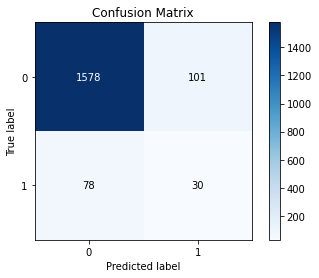



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1679
           1       0.23      0.28      0.25       108

    accuracy                           0.90      1787
   macro avg       0.59      0.61      0.60      1787
weighted avg       0.91      0.90      0.90      1787



********************************************************************************


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
label=['0','1']
print('Results for DecisionTree Classifier:-\n')
start_time = time.time()
dtc.fit(train_vectors_dbow,y_train)
dtc_time = (time.time() - start_time)
print('*'*80)
print('\nTraining time(sec) = ',dtc_time)

y_pred1 = dtc.predict(train_vectors_dbow)

start_time = time.time()
y_pred = dtc.predict(test_vectors_dbow)
dtc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dtc_time2)
cm_dtc = confusion_matrix(y_test, y_pred)
dtc_miss = np.sum(y_pred!=y_test)
acc1_dtc = balanced_accuracy_score(y_train,y_pred1)
acc2_dtc = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80)

print('\nTraining score = ',acc1_dtc)
print('Testing score = ',acc2_dtc)
print('\n')
print('*'*80)

print('\n')
for i in range(len(np.unique(y_train))):
    err = np.sum(cm_dtc[i])-cm_dtc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)
print('Total no of missclassified points (test data) = ',dtc_miss)
print('Total % of missclassified points (test data) = ',(dtc_miss/len(y_test))*100)
print('\n')
print('*'*80)

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80)

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80)

DTC = [acc1_dtc, acc2_dtc, dtc_miss, dtc_miss/len(y_test), dtc_time, dtc_time2]